In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Data Import
Import of the respective test and training data.

In [2]:
testData = pd.read_csv('../../data/test_dataset.csv', sep=",", encoding="latin1")
trainData = pd.read_csv('../../data/train_dataset.csv', sep=",", encoding="latin1")

#ensure that no NAN values occur and all text fields are strings
cleanedTestData = testData[testData['label'].notnull()]
cleanedTestData["text"] = cleanedTestData["text"].astype(str)

cleanedTrainData = trainData[trainData['label'].notnull()]
cleanedTrainData["text"] = cleanedTrainData["text"].astype(str)

print(cleanedTestData.head())
print(cleanedTrainData.head())

   Unnamed: 0  label                                               text  \
0          60      2  Das Studium in Exeter war auÃerordentlich sch...   
1         511      2  Chulalongkorn ist ein TrÃ¤umchen. Das Kursange...   
2         260      1  Das Studium an sich ist weniger anspruchsvoll ...   
3         694      1  Bereits im Sommer hatten wir eine Mail erhalte...   
4         731      2  Es sind sehr viele Kurse auf Englisch angebote...   

   __index_level_0__  
0                 52  
1                428  
2                223  
3                576  
4                610  
   Unnamed: 0  label                                               text  \
0        1183      2  Die Tec de Monterrey ist die renommierteste Un...   
1         881      2  In den Niederlanden sind die Semester nochmal ...   
2        1019      1  Das Kursangebot ist im Kurskatalog zu finden u...   
3          51      2  Ich habe insgesamt 4 Kurse belegt, wovon ein E...   
4         503      1  FÃ¼r VWLer gib

# Model Application
We employed the DummyClassifier with a uniform strategy to get the performance of a random guesser as a baseline (https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). For the application label and texts need to be divided

In [3]:
X_train_clean = cleanedTrainData["text"]
X_test_clean = cleanedTestData["text"]
y_train_clean = cleanedTrainData["label"]
y_test_clean = cleanedTestData["label"]

dummy_clf_clean = DummyClassifier(strategy="uniform", random_state=42)

dummy_clf_clean.fit(X_train_clean, y_train_clean)

y_pred_clean = dummy_clf_clean.predict(X_test_clean)


# Evaluation
For evaluation purposes we employ confusion matrices and the micro averaged F1 Score

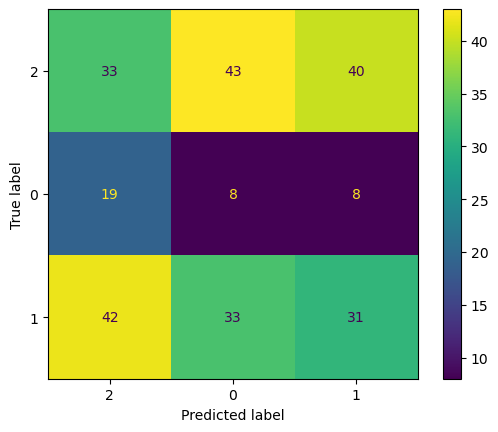

0.2801556420233463
              precision    recall  f1-score   support

    positive       0.10      0.23      0.13        35
    negative       0.39      0.29      0.34       106
     neutral       0.35      0.28      0.31       116

    accuracy                           0.28       257
   macro avg       0.28      0.27      0.26       257
weighted avg       0.33      0.28      0.30       257



In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report
import matplotlib.pyplot as plt
confusion_mat = confusion_matrix(y_test_clean, y_pred_clean, labels=[2, 0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=[2, 0, 1])
disp.plot()
plt.show()
print(f1_score(y_test_clean, y_pred_clean, labels=[2, 0, 1], average='micro'))
print(classification_report(
    y_test_clean, y_pred_clean,
    output_dict=False,
    target_names=["positive", "negative", "neutral"]
))